# Исследование тарифных планов «Смарт» и «Ультра» федерального оператора сотовой связи «Мегалайн»

 ***Цель***
 
 Определить какой тариф приносит больше денег.
 
 ***Задача***
 
 Сравнить затраты абонентов тарифов «Смарт» и «Ультра»
 Сравнить затраты абонентов в Москве и других городах

***Ход исследования***

 «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Решение задачи


**Описание тарифов**

**Тариф «Смарт»**

* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

**Примечание:**
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

In [1]:
from matplotlib import pyplot as plt

In [2]:
import pandas as pd

In [3]:
from scipy import stats as st

In [4]:
import numpy as np

### Шаг 1. Откроем файл с данными и изучим общую информацию


In [5]:
def func_of_read_df(file):
    data = pd.read_csv(file, sep = ',')
    data.info()
    display(data.head(10))
    print('Пропуски')
    print(data.isna().sum())
    print('Дубликаты')
    print(data.duplicated().sum())
    return data
   

df_calls = pd.read_csv('/datasets/calls.csv', sep = ',')
df_internet = pd.read_csv('/datasets/internet.csv', sep = ',')
df_messages = pd.read_csv('/datasets/messages.csv', sep = ',')
df_tariffs = pd.read_csv('/datasets/tariffs.csv', sep = ',')
df_users = pd.read_csv('/datasets/users.csv', sep = ',')

In [6]:
df_calls = func_of_read_df('/datasets/calls.csv')
df_internet = func_of_read_df('/datasets/internet.csv')
df_messages = func_of_read_df('/datasets/messages.csv')
df_tariffs = func_of_read_df('/datasets/tariffs.csv')
df_users = func_of_read_df('/datasets/users.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Пропуски
id           0
call_date    0
duration     0
user_id      0
dtype: int64
Дубликаты
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Пропуски
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
Дубликаты
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Пропуски
id              0
message_date    0
user_id         0
dtype: int64
Дубликаты
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Пропуски
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64
Дубликаты
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Пропуски
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64
Дубликаты
0


**Описание данных**

Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Шаг 2. Подготовим данные
Приведем данные к нужным типам;
Найдем и исправим ошибки в данных, если они есть.
Исправим ошибки. В данных есть звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Заменим в солбцах с датами на тип  `datetime64`

In [7]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_calls['call_date_year'] = pd.DatetimeIndex(df_calls['call_date']).year
df_calls['call_date_month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_internet['session_date_year'] = pd.DatetimeIndex(df_internet['session_date']).year
df_internet['session_date_month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_messages['message_date_year'] = pd.DatetimeIndex(df_messages['message_date']).year
df_messages['message_date_month'] = pd.DatetimeIndex(df_messages['message_date']).month



Столбец `duration` округлим вверх и приведем к типу `int`

In [8]:
df_calls['duration'] = ((-1)*df_calls['duration']//1*(-1)).astype('int')


In [9]:
np.ceil(df_calls['duration']).astype('int')

0          0
1          0
2          3
3         14
4          6
          ..
202602     1
202603    19
202604    11
202605     5
202606    20
Name: duration, Length: 202607, dtype: int64

Посчитаем для каждого пользователя:

* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).


In [10]:
df_calls_sum = df_calls.groupby(['user_id', 'call_date_month']).agg({'duration':['sum','count']}).reset_index()
df_calls_sum.columns=['user_id', 'month','duration_sum', 'count']
df_calls_sum['duration_mean'] = df_calls_sum['duration_sum']/df_calls_sum['count']
display(df_calls_sum)
df_internet_sum = df_internet.groupby(['user_id', 'session_date_month']).agg({'mb_used':['sum']}).reset_index()
df_internet_sum.columns = ['user_id', 'month','mb_used_sum']
display(df_internet_sum)
df_messages_count = df_messages.groupby(['user_id', 'message_date_month']).agg({'id':['count']}).reset_index()
df_messages_count.columns=['user_id', 'month','message_count']
display(df_messages_count)

,user_id,month,duration_sum,count,duration_mean
0,1000,5,159,22,7.227273
1,1000,6,172,43,4.000000
2,1000,7,340,47,7.234043
3,1000,8,408,52,7.846154
4,1000,9,466,58,8.034483
...,...,...,...,...,...
3169,1498,10,247,41,6.024390
3170,1499,9,70,9,7.777778
3171,1499,10,449,68,6.602941
3172,1499,11,612,74,8.270270


,user_id,month,mb_used_sum
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [11]:
df_calls_sum['duration_sum'].sum(), df_internet_sum['mb_used_sum'].sum(), df_messages_count['message_count'].sum()

(1450301, 55305267.730000004, 123036)


Найдем помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножем на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану)

In [12]:
df_users = df_users.rename (columns= {'tariff': 'tariff_name'})
df_users = df_users.merge(df_tariffs, on='tariff_name', how='left')
display(df_users)

df_users_tarif_city = df_users.drop(columns = ['age', 'first_name', 'last_name', 'reg_date', 
                                           'messages_included', 'churn_date',
                                           'mb_per_month_included', 'rub_per_gb', 'rub_per_message', 'minutes_included',
                                            'rub_per_minute'], axis=1)
df_users_tarif_city.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,1000,30720,3000,1950,150,1,1
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart,50,15360,500,550,200,3,3
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart,50,15360,500,550,200,3,3
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          500 non-null    int64 
 1   city             500 non-null    object
 2   tariff_name      500 non-null    object
 3   rub_monthly_fee  500 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 19.5+ KB


In [13]:
df_calls_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        3174 non-null   int64  
 1   month          3174 non-null   int64  
 2   duration_sum   3174 non-null   int64  
 3   count          3174 non-null   int64  
 4   duration_mean  3174 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 124.1 KB


In [14]:
def info_df(df):
    df.info()
    print('Пропуски')
    print(df.isna().sum())
    print('Дубликаты')
    print(df.duplicated().sum())

In [15]:
df_calls_sum.user_id.nunique() 

492

In [16]:
df_users.user_id.nunique() 

500

In [17]:
pd.merge(df_calls_sum, df_users, on='user_id', how='outer').user_id.nunique() 

500

In [18]:
df_calls_sum  =pd.merge(df_calls_sum, df_users, on='user_id', how='outer')
df_calls_sum = df_calls_sum.drop(columns = ['age', 'first_name', 'last_name', 'reg_date', 'city', 'tariff_name',
                                           'messages_included', 'churn_date', 'rub_monthly_fee', 
                                           'mb_per_month_included', 'rub_per_gb', 'rub_per_message'], axis=1)
info_df(df_calls_sum)
df_calls_sum['duration_sum'] = df_calls_sum['duration_sum'].fillna(0)
df_calls_sum['count'] = df_calls_sum['count'].fillna(0)
df_calls_sum['duration_mean'] = df_calls_sum['duration_mean'].fillna(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 3181
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           3182 non-null   int64  
 1   month             3174 non-null   float64
 2   duration_sum      3174 non-null   float64
 3   count             3174 non-null   float64
 4   duration_mean     3174 non-null   float64
 5   minutes_included  3182 non-null   int64  
 6   rub_per_minute    3182 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 198.9 KB
Пропуски
user_id             0
month               8
duration_sum        8
count               8
duration_mean       8
minutes_included    0
rub_per_minute      0
dtype: int64
Дубликаты
0


In [19]:
user_not_calls = df_calls_sum[df_calls_sum['month'].isna() == True]['user_id']

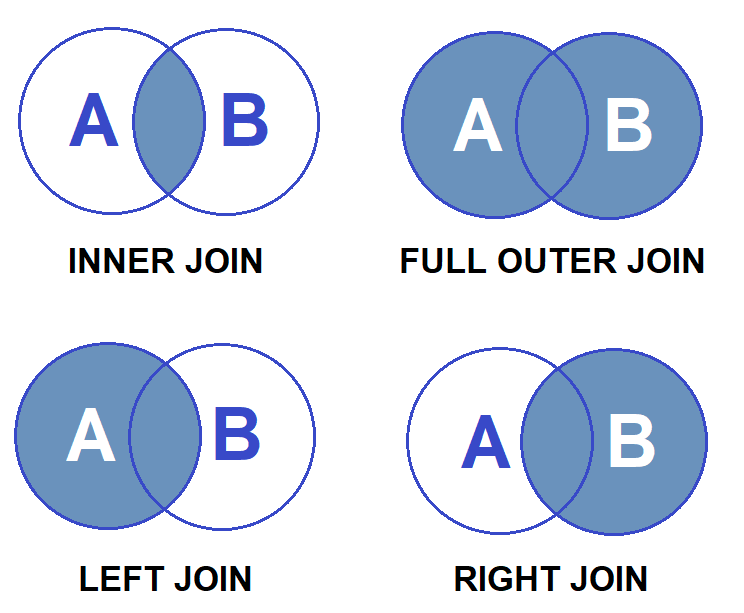

In [20]:
df_internet_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      3203 non-null   int64  
 1   month        3203 non-null   int64  
 2   mb_used_sum  3203 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB


In [21]:
df_internet_sum = pd.merge(df_internet_sum, df_users, on='user_id', how='outer')
df_internet_sum = df_internet_sum.drop(columns = ['age', 'first_name', 'last_name', 'reg_date',
                                            'messages_included', 'churn_date',   'city', 'tariff_name',
                                            'rub_per_minute', 'rub_per_message', 'minutes_included', 'rub_monthly_fee'], axis=1)
info_df(df_internet_sum)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3206 entries, 0 to 3205
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3206 non-null   int64  
 1   month                  3203 non-null   float64
 2   mb_used_sum            3203 non-null   float64
 3   mb_per_month_included  3206 non-null   int64  
 4   rub_per_gb             3206 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 150.3 KB
Пропуски
user_id                  0
month                    3
mb_used_sum              3
mb_per_month_included    0
rub_per_gb               0
dtype: int64
Дубликаты
0


In [22]:
df_internet_sum['mb_used_sum'] = df_internet_sum['mb_used_sum'].fillna(0)


In [23]:
user_not_internet = df_internet_sum[df_internet_sum['month'].isna() == True]['user_id']

In [24]:
df_messages_count.info()
df_messages_count = pd.merge(df_messages_count, df_users, on='user_id', how='outer')
df_messages_count = df_messages_count.drop(columns = ['age', 'first_name', 'last_name', 'reg_date',
                                            'churn_date', 'rub_per_minute', 'city', 'tariff_name',
                                            'minutes_included', 'mb_per_month_included', 'rub_per_gb', 'rub_monthly_fee'], axis=1)
info_df(df_messages_count)
df_messages_count['message_count'] = df_messages_count['message_count'].fillna(0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   user_id        2717 non-null   int64
 1   month          2717 non-null   int64
 2   message_count  2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2791 entries, 0 to 2790
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            2791 non-null   int64  
 1   month              2717 non-null   float64
 2   message_count      2717 non-null   float64
 3   messages_included  2791 non-null   int64  
 4   rub_per_message    2791 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 130.8 KB
Пропуски
user_id               0
month                74
message_count        74
messages_included     0
rub_per_message       0
dtype: int64
Дубликаты

In [25]:
user_not_messages = df_messages_count[df_messages_count['month'].isna() == True]['user_id']

In [26]:
df_calls_sum['minutes_un_limit'] = df_calls_sum['minutes_included'] - df_calls_sum['duration_sum']
df_calls_sum['minutes_un_limit']  = (-1)*df_calls_sum['minutes_un_limit'].where(df_calls_sum['minutes_un_limit']<0, 0)
df_calls_sum['rub_minutes_un_limit'] = df_calls_sum['rub_per_minute'] * df_calls_sum['minutes_un_limit']

display(df_calls_sum )

,user_id,month,duration_sum,count,duration_mean,minutes_included,rub_per_minute,minutes_un_limit,rub_minutes_un_limit
0,1000,5.0,159.0,22.0,7.227273,3000,1,-0.0,-0.0
1,1000,6.0,172.0,43.0,4.000000,3000,1,-0.0,-0.0
2,1000,7.0,340.0,47.0,7.234043,3000,1,-0.0,-0.0
3,1000,8.0,408.0,52.0,7.846154,3000,1,-0.0,-0.0
4,1000,9.0,466.0,58.0,8.034483,3000,1,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...
3177,1231,NaN,0.0,0.0,0.000000,3000,1,-0.0,-0.0
3178,1328,NaN,0.0,0.0,0.000000,3000,1,-0.0,-0.0
3179,1371,NaN,0.0,0.0,0.000000,500,3,-0.0,-0.0
3180,1473,NaN,0.0,0.0,0.000000,3000,1,-0.0,-0.0


In [27]:
df_internet_sum['internet_un_limit'] = df_internet_sum['mb_per_month_included'] - df_internet_sum['mb_used_sum']
df_internet_sum['internet_un_limit'] = (df_internet_sum['internet_un_limit']//1024).astype('int')
df_internet_sum['internet_un_limit']  = (
    (-1)*df_internet_sum['internet_un_limit']
    .where(df_internet_sum['internet_un_limit']<0, 0)
)
df_internet_sum['rub_internet_un_limit'] = df_internet_sum['rub_per_gb'] * df_internet_sum['internet_un_limit']

display(df_internet_sum)

,user_id,month,mb_used_sum,mb_per_month_included,rub_per_gb,internet_un_limit,rub_internet_un_limit
0,1000,5.0,2253.49,30720,150,0,0
1,1000,6.0,23233.77,30720,150,0,0
2,1000,7.0,14003.64,30720,150,0,0
3,1000,8.0,14055.93,30720,150,0,0
4,1000,9.0,14568.91,30720,150,0,0
...,...,...,...,...,...,...,...
3201,1499,11.0,17963.31,15360,200,3,600
3202,1499,12.0,13055.58,15360,200,0,0
3203,1128,NaN,0.00,30720,150,0,0
3204,1273,NaN,0.00,30720,150,0,0


In [28]:
df_messages_count['messages_un_limit'] = df_messages_count['messages_included'] - df_messages_count['message_count']
df_messages_count['messages_un_limit']  = (-1)*df_messages_count['messages_un_limit'].where(df_messages_count['messages_un_limit']<0, 0)
df_messages_count['rub_messages_un_limit'] = df_messages_count['rub_per_message'] * df_messages_count['messages_un_limit']

display(df_messages_count)

,user_id,month,message_count,messages_included,rub_per_message,messages_un_limit,rub_messages_un_limit
0,1000,5.0,22.0,1000,1,-0.0,-0.0
1,1000,6.0,60.0,1000,1,-0.0,-0.0
2,1000,7.0,75.0,1000,1,-0.0,-0.0
3,1000,8.0,81.0,1000,1,-0.0,-0.0
4,1000,9.0,57.0,1000,1,-0.0,-0.0
...,...,...,...,...,...,...,...
2786,1462,NaN,0.0,50,3,-0.0,-0.0
2787,1466,NaN,0.0,1000,1,-0.0,-0.0
2788,1469,NaN,0.0,1000,1,-0.0,-0.0
2789,1479,NaN,0.0,50,3,-0.0,-0.0


In [29]:
df_sum = pd.merge(df_internet_sum, df_calls_sum, on=['user_id', 'month'], how='outer')
df_sum = pd.merge(df_sum, df_messages_count, on=['user_id', 'month'], how='outer')
df_sum = pd.merge(df_sum, df_users_tarif_city, on=['user_id'], how='outer')
info_df(df_sum)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 3294
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3295 non-null   int64  
 1   month                  3214 non-null   float64
 2   mb_used_sum            3206 non-null   float64
 3   mb_per_month_included  3206 non-null   float64
 4   rub_per_gb             3206 non-null   float64
 5   internet_un_limit      3206 non-null   float64
 6   rub_internet_un_limit  3206 non-null   float64
 7   duration_sum           3182 non-null   float64
 8   count                  3182 non-null   float64
 9   duration_mean          3182 non-null   float64
 10  minutes_included       3182 non-null   float64
 11  rub_per_minute         3182 non-null   float64
 12  minutes_un_limit       3182 non-null   float64
 13  rub_minutes_un_limit   3182 non-null   float64
 14  message_count          2791 non-null   float64
 15  mess

In [30]:
user_not = pd.merge(user_not_calls, user_not_messages, on='user_id', how='inner')
user_not = pd.merge(user_not, user_not_internet, on='user_id', how='inner')
print(user_not)

   user_id
0     1128
1     1371


In [31]:
df_sum['user_id'].nunique()

500

In [32]:
df_sum['rub_internet_un_limit']=df_sum['rub_internet_un_limit'].fillna(0)
df_sum['rub_messages_un_limit']=df_sum['rub_messages_un_limit'].fillna(0)
df_sum['rub_minutes_un_limit']=df_sum['rub_minutes_un_limit'].fillna(0)
df_sum['message_count']=df_sum['message_count'].fillna(0)
df_sum['duration_sum']=df_sum['duration_sum'].fillna(0)
df_sum['mb_used_sum']=df_sum['mb_used_sum'].fillna(0)

In [33]:
df_sum = df_sum.drop(columns = ['rub_per_minute', 'rub_per_minute',
                                'mb_per_month_included', 'rub_per_gb', 
                                'minutes_included', 'mb_per_month_included', 'rub_per_gb', 
                                'messages_included', 'rub_per_message'], axis=1)

In [34]:
df_sum['sum'] = df_sum['rub_internet_un_limit'] + df_sum['rub_monthly_fee'] + df_sum['rub_minutes_un_limit'] + df_sum['rub_messages_un_limit']

In [35]:
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 3294
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3295 non-null   int64  
 1   month                  3214 non-null   float64
 2   mb_used_sum            3295 non-null   float64
 3   internet_un_limit      3206 non-null   float64
 4   rub_internet_un_limit  3295 non-null   float64
 5   duration_sum           3295 non-null   float64
 6   count                  3182 non-null   float64
 7   duration_mean          3182 non-null   float64
 8   minutes_un_limit       3182 non-null   float64
 9   rub_minutes_un_limit   3295 non-null   float64
 10  message_count          3295 non-null   float64
 11  messages_un_limit      2791 non-null   float64
 12  rub_messages_un_limit  3295 non-null   float64
 13  city                   3295 non-null   object 
 14  tariff_name            3295 non-null   object 
 15  rub_

In [36]:
df_sum = df_sum.dropna(subset =['month']).reset_index(drop=True)

In [37]:
df_sum = df_sum.dropna(subset =['sum']).reset_index(drop=True)
display(df_sum)
df_sum.info()

,user_id,month,mb_used_sum,internet_un_limit,rub_internet_un_limit,duration_sum,count,duration_mean,minutes_un_limit,rub_minutes_un_limit,message_count,messages_un_limit,rub_messages_un_limit,city,tariff_name,rub_monthly_fee,sum
0,1000,5.0,2253.49,0.0,0.0,159.0,22.0,7.227273,-0.0,-0.0,22.0,-0.0,-0.0,Краснодар,ultra,1950,1950.0
1,1000,6.0,23233.77,0.0,0.0,172.0,43.0,4.000000,-0.0,-0.0,60.0,-0.0,-0.0,Краснодар,ultra,1950,1950.0
2,1000,7.0,14003.64,0.0,0.0,340.0,47.0,7.234043,-0.0,-0.0,75.0,-0.0,-0.0,Краснодар,ultra,1950,1950.0
3,1000,8.0,14055.93,0.0,0.0,408.0,52.0,7.846154,-0.0,-0.0,81.0,-0.0,-0.0,Краснодар,ultra,1950,1950.0
4,1000,9.0,14568.91,0.0,0.0,466.0,58.0,8.034483,-0.0,-0.0,57.0,-0.0,-0.0,Краснодар,ultra,1950,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1273,8.0,0.00,NaN,0.0,253.0,53.0,4.773585,-0.0,-0.0,41.0,-0.0,-0.0,Курган,ultra,1950,1950.0
3210,1273,9.0,0.00,NaN,0.0,223.0,33.0,6.757576,-0.0,-0.0,32.0,-0.0,-0.0,Курган,ultra,1950,1950.0
3211,1273,10.0,0.00,NaN,0.0,315.0,40.0,7.875000,-0.0,-0.0,35.0,-0.0,-0.0,Курган,ultra,1950,1950.0
3212,1273,11.0,0.00,NaN,0.0,272.0,45.0,6.044444,-0.0,-0.0,29.0,-0.0,-0.0,Курган,ultra,1950,1950.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   float64
 2   mb_used_sum            3214 non-null   float64
 3   internet_un_limit      3203 non-null   float64
 4   rub_internet_un_limit  3214 non-null   float64
 5   duration_sum           3214 non-null   float64
 6   count                  3174 non-null   float64
 7   duration_mean          3174 non-null   float64
 8   minutes_un_limit       3174 non-null   float64
 9   rub_minutes_un_limit   3214 non-null   float64
 10  message_count          3214 non-null   float64
 11  messages_un_limit      2717 non-null   float64
 12  rub_messages_un_limit  3214 non-null   float64
 13  city                   3214 non-null   object 
 14  tariff_name            3214 non-null   object 
 15  rub_

In [38]:
df_sum['sum'].sum()

4914451.0

In [39]:
df_sum['user_id'].nunique()

498

In [40]:
df_calls_sum['duration_sum'].sum(), df_internet_sum['mb_used_sum'].sum(), df_messages_count['message_count'].sum()

(1450301.0, 55305267.730000004, 123036.0)

In [41]:
df_sum['duration_sum'].sum(), df_sum['mb_used_sum'].sum(), df_sum['message_count'].sum()

(1450301.0, 55305267.730000004, 123036.0)

### Шаг 3. Проанализируйте данные
Опишем поведение клиентов оператора, исходя из выборки.
Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение.
Построим гистограммы.
Опишем распределения.

In [42]:
df_sum_ultra = df_sum[df_sum['tariff_name'] == 'ultra']
df_sum_smart = df_sum[df_sum['tariff_name'] == 'smart']


Среднее - сообщения тариф Ультра: 49.36345177664975
Среднее - сообщения тариф Смарт: 33.384028712427096
Дисперсия сообщения тариф Ультра: 2282.9460753948824
Дисперсия сообщения тариф Смарт: 796.455482917076
Стандартное отклонение сообщения тариф Ультра: 47.78018496610161
Стандартное отклонение сообщения тариф Смарт: 28.221542886898938
224.0 143.0
Остаток/первышение лимита Ультра 951
Остаток/первышение лимита Смарт 17


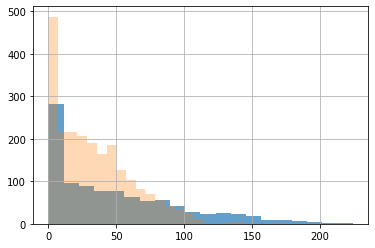

In [43]:
mean_message_ultra = df_sum_ultra['message_count'].mean()
mean_message_smart = df_sum_smart['message_count'].mean()
print('Среднее - сообщения тариф Ультра:',mean_message_ultra)
print('Среднее - сообщения тариф Смарт:', mean_message_smart)
var_message_ultra = np.var(df_sum_ultra['message_count'])
var_message_smart = np.var(df_sum_smart['message_count'])
print('Дисперсия сообщения тариф Ультра:', var_message_ultra)
print('Дисперсия сообщения тариф Смарт:',var_message_smart)
std_message_ultra = np.std(df_sum_ultra['message_count'])
std_message_smart = np.std(df_sum_smart['message_count'])
print('Стандартное отклонение сообщения тариф Ультра:', std_message_ultra)
print('Стандартное отклонение сообщения тариф Смарт:', std_message_smart)
df_sum_ultra['message_count'].hist(bins=20, alpha=0.7)
df_sum_smart['message_count'].hist(bins=20, alpha=0.3)
print(df_sum_ultra['message_count'].max(),
df_sum_smart['message_count'].max())
print('Остаток/первышение лимита Ультра',1000 - round(mean_message_ultra))
print('Остаток/первышение лимита Смарт',50 - round(mean_message_smart))

In [44]:
df_sum_ultra.describe()

,user_id,month,mb_used_sum,internet_un_limit,rub_internet_un_limit,duration_sum,count,duration_mean,minutes_un_limit,rub_minutes_un_limit,message_count,messages_un_limit,rub_messages_un_limit,rub_monthly_fee,sum
count,985.000000,985.000000,985.000000,975.000000,985.000000,985.000000,951.000000,951.000000,951.0,985.0,985.000000,795.0,985.0,985.0,985.000000
mean,1263.094416,8.250761,19468.805208,0.809231,120.152284,526.623350,76.016824,7.133455,0.0,0.0,49.363452,0.0,0.0,1950.0,2070.152284
std,140.694908,2.871762,10087.170752,2.519435,376.187114,317.606098,42.403348,1.116327,0.0,0.0,47.804457,0.0,0.0,0.0,376.187114
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.0,-0.0,0.000000,-0.0,-0.0,1950.0,1950.000000
25%,1143.000000,6.000000,11770.260000,0.000000,0.000000,284.000000,43.000000,6.691833,-0.0,0.0,6.000000,-0.0,0.0,1950.0,1950.000000
50%,1277.000000,9.000000,19308.010000,0.000000,0.000000,518.000000,75.000000,7.166667,0.0,0.0,38.000000,0.0,0.0,1950.0,1950.000000
75%,1381.000000,11.000000,26837.690000,0.000000,0.000000,752.000000,105.000000,7.669399,-0.0,0.0,79.000000,-0.0,0.0,1950.0,1950.000000
max,1495.000000,12.000000,49745.690000,19.000000,2850.000000,1673.000000,244.000000,16.666667,-0.0,-0.0,224.000000,-0.0,-0.0,1950.0,4800.000000


* Среднее колличество сообщений на тарифе Ультра  49. 
* Среднее колличество сообщений на тарифе Смарт 33.
* На тарифе Ультра в полтара раза больше отправляют сообщений.
* При этом рассеивания значений  на тарифе Ультра больше. 
* Сообщения в среднем расходуются внутри лимитов тарифов. В тарифе Ультра нет случаев использования всех сообщений внутри тарифа. В тарифе Смарт расходуются вне лимита. 


Среднее - минуты тариф Ультра: 526.6233502538071
Среднее - минуты тариф Смарт: 417.9349484073576
Дисперсия - минуты тариф Ультра: 100771.2236172022
Дисперсия  - минуты тариф Смарт: 36203.06665209469
Стандартное отклонение -  минуты тариф Ультра: 317.44483554974113
Стандартное отклонение  - минуты тариф Смарт: 190.27103471651876
1673.0 1435.0
Остаток/первышение лимита Ультра 2473
Остаток/первышение лимита Смарт 82


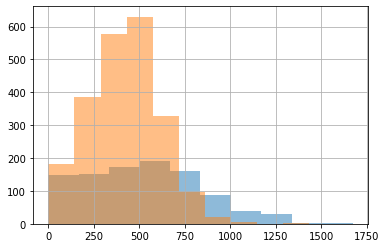

In [45]:
mean_minutes_ultra = df_sum_ultra['duration_sum'].mean()
mean_minutes_smart = df_sum_smart['duration_sum'].mean()

var_minutes_ultra = np.var(df_sum_ultra['duration_sum'])
var_minutes_smart = np.var(df_sum_smart['duration_sum'])

std_minutes_ultra = np.std(df_sum_ultra['duration_sum'])
std_minutes_smart = np.std(df_sum_smart['duration_sum'])

df_sum_ultra['duration_sum'].hist(bins=10, alpha=0.5)
df_sum_smart['duration_sum'].hist(bins=10, alpha=0.5)

print('Среднее - минуты тариф Ультра:',mean_minutes_ultra)
print('Среднее - минуты тариф Смарт:', mean_minutes_smart)
print('Дисперсия - минуты тариф Ультра:', var_minutes_ultra)
print('Дисперсия  - минуты тариф Смарт:', var_minutes_smart)
print('Стандартное отклонение -  минуты тариф Ультра:', std_minutes_ultra)
print('Стандартное отклонение  - минуты тариф Смарт:', std_minutes_smart)
print(df_sum_ultra['duration_sum'].max(), df_sum_smart['duration_sum'].max())
print('Остаток/первышение лимита Ультра',3000 - round(mean_minutes_ultra))
print('Остаток/первышение лимита Смарт',500 - round(mean_minutes_smart))

* Среднее - минуты тариф Ультра: 526
* Среднее - минуты тариф Смарт: 417
* Разница в среднем составляет всего 103 минут.
* При этом рассеивания значений  на тарифе Ультра больше. 
* Среднее по минутам на тарифе Смарт близко к показателю в 500 минут, входящих в тариф, соответственно достаточно много аббонетов используют минуты вне тарифа. 
* В тарифе Ультра нет фактов превышения минут внутри тарифа. 

Среднее - интернет тариф Ультра: 19468.80520812183
Среднее - интернет тариф Смарт: 16208.386989681472
Дисперсия - интернет тариф Ультра: 101647713.2617464
Дисперсия  - интернет тариф Смарт: 34447035.49528493
Стандартное отклонение -  интернет тариф Ультра: 10082.049060669484
Стандартное отклонение  - интернет тариф Смарт: 5869.159692433401
49745.69000000001 38552.44999999999
Остаток/первышение лимита Ультра 11251
Остаток/первышение лимита Смарт -848


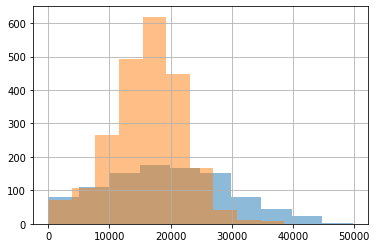

In [46]:
mean_internet_ultra = df_sum_ultra['mb_used_sum'].mean()
mean_internet_smart = df_sum_smart['mb_used_sum'].mean()

var_internet_ultra = np.var(df_sum_ultra['mb_used_sum'])
var_internet_smart = np.var(df_sum_smart['mb_used_sum'])

std_internet_ultra = np.std(df_sum_ultra['mb_used_sum'])
std_internet_smart = np.std(df_sum_smart['mb_used_sum'])

df_sum_ultra['mb_used_sum'].hist(bins=10, alpha=0.5)
df_sum_smart['mb_used_sum'].hist(bins=10, alpha=0.5)

print('Среднее - интернет тариф Ультра:',mean_internet_ultra)
print('Среднее - интернет тариф Смарт:', mean_internet_smart)
print('Дисперсия - интернет тариф Ультра:', var_internet_ultra)
print('Дисперсия  - интернет тариф Смарт:', var_internet_smart)
print('Стандартное отклонение -  интернет тариф Ультра:', std_internet_ultra)
print('Стандартное отклонение  - интернет тариф Смарт:', std_internet_smart)
print(df_sum_ultra['mb_used_sum'].max(), df_sum_smart['mb_used_sum'].max())
print('Остаток/первышение лимита Ультра',30*1024 - round(mean_internet_ultra))
print('Остаток/первышение лимита Смарт',15*1024 - round(mean_internet_smart))

* Среднее - интернет тариф Ультра: 19469
* Среднее - интернет тариф Смарт: 16208
* Разница между средними в 3Гб
* При этом рассеивание значений  не сильно отлечается
* По траифу Ультра расход интернет трафика в среднем происходит внутри тарифа 
* По тарифу Смарт расход в среднем больше, чем включено в тариф 


Среднее - итоговая сумма тариф Ультра: 2070.1522842639592
Среднее - итоговая сумма тариф Смарт: 1289.9735307312696
Дисперсия - интернет тариф Ультра: 141373.07325620347
Дисперсия  - итоговая суммат тариф Смарт: 669485.2209234245
Стандартное отклонение -  итоговая сумма тариф Ультра: 375.9961080333192
Стандартное отклонение  - итоговая суммат тариф Смарт: 818.2207653949051
4800.0 6770.0


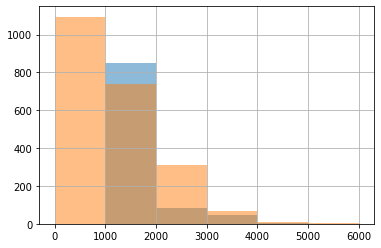

In [47]:
mean_sum_ultra = df_sum_ultra['sum'].mean()
mean_sum_smart = df_sum_smart['sum'].mean()

var_sum_ultra = np.var(df_sum_ultra['sum'])
var_sum_smart = np.var(df_sum_smart['sum'])

std_sum_ultra = np.std(df_sum_ultra['sum'])
std_sum_smart = np.std(df_sum_smart['sum'])

df_sum_ultra['sum'].hist(bins=[0, 1000, 2000, 3000,4000, 5000, 6000], alpha=0.5)
df_sum_smart['sum'].hist(bins=[0, 1000, 2000, 3000,4000, 5000, 6000], alpha=0.5)

print('Среднее - итоговая сумма тариф Ультра:',mean_sum_ultra)
print('Среднее - итоговая сумма тариф Смарт:', mean_sum_smart)
print('Дисперсия - интернет тариф Ультра:', var_sum_ultra)
print('Дисперсия  - итоговая суммат тариф Смарт:', var_sum_smart)
print('Стандартное отклонение -  итоговая сумма тариф Ультра:', std_sum_ultra)
print('Стандартное отклонение  - итоговая суммат тариф Смарт:', std_sum_smart)
print(df_sum_ultra['sum'].max(), df_sum_smart['sum'].max())

* Средняя оплата по  тарифу Ультра составляет  2070 руб, что близко к ежемесячной плате. Это свидетельствует о том, что пакета сообщений, минут и трафика в среднем хватает абоненту на месяц.  
* Средняя оплата по  тарифу Смарт составляет  1290 руб, что больше чем в два раза превышает абонентскую плату. Это свидетельствует о том, что пакета сообщений, минут и трафика в среднем не хватает абоненту на месяц.
* Рассеивание значений на тарифе Ультра меньше чем на  тарифе Смарт

In [48]:
df_sum_ultra_moscow = df_sum_ultra[df_sum_ultra['city'] == 'Москва']
df_sum_smart_moscow = df_sum_smart[df_sum_smart['city'] == 'Москва']
df_sum_ultra_other = df_sum_ultra[df_sum_ultra['city'] != 'Москва']
df_sum_smart_other = df_sum_smart[df_sum_smart['city'] != 'Москва']


<AxesSubplot:>

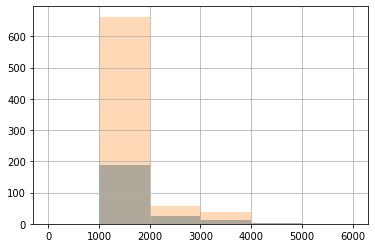

In [49]:
df_sum_ultra_moscow['sum'].hist(bins=[0, 500, 1000, 2000, 3000,4000, 5000, 6000], alpha=0.5)
df_sum_ultra_other['sum'].hist(bins=[0, 500, 1000, 2000, 3000,4000, 5000, 6000], alpha=0.3)

<AxesSubplot:>

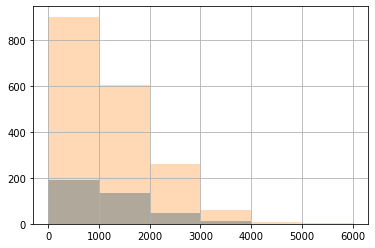

In [50]:
df_sum_smart_moscow['sum'].hist(bins=[0, 1000, 2000, 3000,4000, 5000, 6000], alpha=0.5)
df_sum_smart_other['sum'].hist(bins=[0, 1000, 2000, 3000,4000, 5000, 6000], alpha=0.3)

<AxesSubplot:>

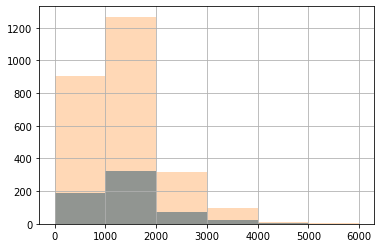

In [51]:
df_sum[df_sum['city'] == 'Москва']['sum'].hist(bins=[0, 1000, 2000, 3000,4000, 5000, 6000], alpha=0.7)
df_sum[df_sum['city'] != 'Москва']['sum'].hist(bins=[0, 1000, 2000, 3000,4000, 5000, 6000], alpha=0.3)

### Шаг 4. Проверьте гипотезы

## Гипотеза 1
Нулевая гипотеза

**Средняя выручка пользователей тарифов «Ультра» и «Смарт» совпадает**

Альтернативная гипотеза

**Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается**


In [52]:
alpha = 0.01 

results = st.ttest_ind(df_sum_ultra['sum'], df_sum_smart['sum'], equal_var = False) 
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Вывод: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается


## Гипотеза 2
Нулевая гипотеза

**Средняя выручка пользователей из Москвы совпадает с  выручкой пользователей из других регионов**


Альтернативная гипотеза

**Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**


In [53]:
alpha = 0.01 

results = st.ttest_ind(df_sum[df_sum['city'] == 'Москва']['sum'], df_sum[df_sum['city'] != 'Москва']['sum'], equal_var = False) 

print('p-значение:', results.pvalue)
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


In [54]:


alpha = 0.01 

results = st.ttest_ind(df_sum_ultra_other['sum'], df_sum_ultra_moscow['sum'], equal_var = False) 

print('p-значение:', results.pvalue)
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8544997530689904
Не получилось отвергнуть нулевую гипотезу


In [55]:

alpha = 0.01 
results = st.ttest_ind(df_sum_smart_other['sum'], df_sum_smart_moscow['sum'], equal_var = False) # ваш код: проведите тест и посчитайте p-значение

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.15468343176376667
Не получилось отвергнуть нулевую гипотезу


Выводы:
Средняя выручка пользователей из Москвы совпадает с выручкой пользователей из других регионов не зависимо от тарифа


# Шаг 5. Общий вывод
Средняя выручка пользователей из Москвы совпадает с выручкой пользователей из других регионов не зависимо от тарифа.
Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, на Ультра тратят больше. 
При этом средняя оплата по тарифу Ультра составляет 2066 руб, что близко к ежемесячной плате. Это свидетельствует о том, что пакета сообщений, минут и трафика в среднем хватает абоненту на месяц и абоненты дополнительно не тратят на дополнительные услуги. 
Средняя оплата по тарифу Смарт составляет 1273 руб, что больше чем в два раза превышает абонентскую плату. Это свидетельствует о том, что пакета сообщений, минут и трафика в среднем не хватает абоненту на месяц, абоненты тратят на дополнительные услуги больше, чем на абонентскую плату. 


